## Import Python Libraries and Data Sets

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

traindf = pd.read_csv('train.csv')
print('The size of the training data frame is:', traindf.shape)

testdf = pd.read_csv('test.csv')
print('The size of the testing data frame is:', testdf.shape)

traindf.head()

The size of the training data frame is: (28800, 60)
The size of the testing data frame is: (3, 58)


,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,NaN,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.29,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2019,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.23,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,NaN,5.0,2.0,No,2.0,2.0,PB,NaN,MAC,Hispanic or Latino,2018,No,NaN,Yes,NaN,2.0,No,56.81,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


# EDA

## EDA On Target Variable(s)

In this case we have to main target variables, `efs` and `efs_time`. `efs` is a binary variable where a value of 1 means the patient did not survive and their`efs_time` value is associated with their time of death. A value of 0 means that no event has been reported but it is unclear if the patient survived, however, the patient survived at least as long as their reported `efs_time`.

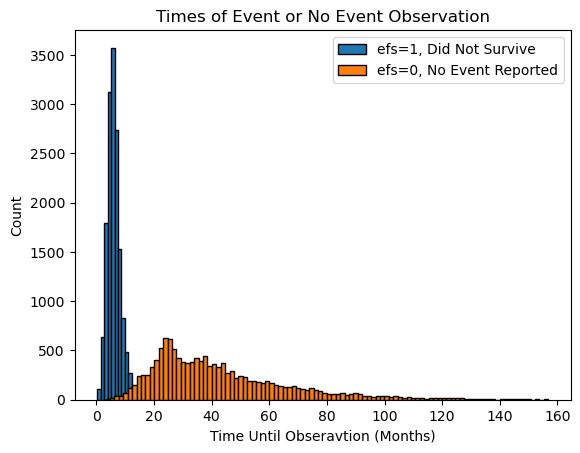

In [9]:
plt.hist(traindf.loc[traindf['efs']==1, 'efs_time'], bins=100, edgecolor='black', label="efs=1, Did Not Survive")
plt.hist(traindf.loc[traindf['efs']==0, 'efs_time'], bins=100, edgecolor='black', label='efs=0, No Event Reported')
plt.xlabel('Time Until Obseravtion (Months)')
plt.ylabel('Count')
plt.title('Times of Event or No Event Observation')
plt.legend()
plt.show()

## Target Variable Transformation
Combine `efs` and `efs_time` to make a new target variable which is a function of both.

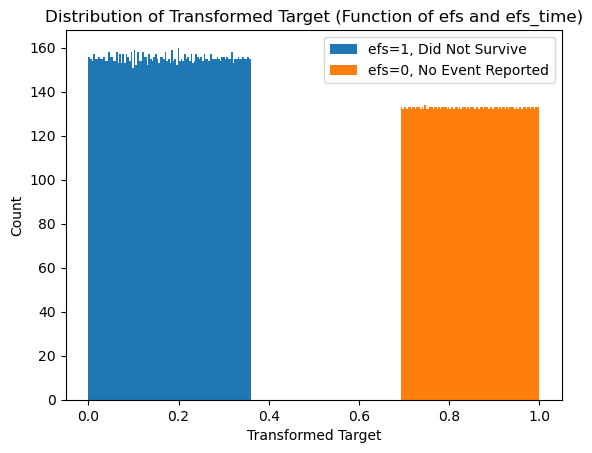

In [37]:
traindf['y'] = traindf['efs_time'].values
mx = traindf.loc[traindf['efs']==1, 'efs_time'].max()
mn = traindf.loc[traindf['efs']==0, 'efs_time'].min()
traindf.loc[traindf['efs']==0, 'y'] = traindf.loc[traindf['efs']==0, 'y'] + mx - mn
traindf['y'] = traindf['y'].rank()
traindf.loc[traindf['efs']==0, 'y'] += len(traindf)//2
traindf['y'] = traindf['y']/traindf['y'].max()

plt.hist(traindf.loc[traindf['efs']==1, 'y'], bins=100, label="efs=1, Did Not Survive")
plt.hist(traindf.loc[traindf['efs']==0, 'y'], bins=100, label='efs=0, No Event Reported')
plt.xlabel('Transformed Target')
plt.ylabel('Count')
plt.title('Distribution of Transformed Target (Function of efs and efs_time)')
plt.legend()
plt.show()